In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path ="data.csv"

In [3]:
df = pd.read_csv(path)
df

,C1,C2,Unnamed: 2
0,120,110,NaN
1,54,48,NaN
2,20,67,NaN
3,62,36,NaN
4,24,31,NaN
5,39,43,NaN
6,49,23,NaN
7,27,60,NaN
8,56,49,NaN
9,66,47,NaN


In [4]:
columns = ['C1', 'C2']

In [5]:
df = df[columns]
df

,C1,C2
0,120,110
1,54,48
2,20,67
3,62,36
4,24,31
5,39,43
6,49,23
7,27,60
8,56,49
9,66,47


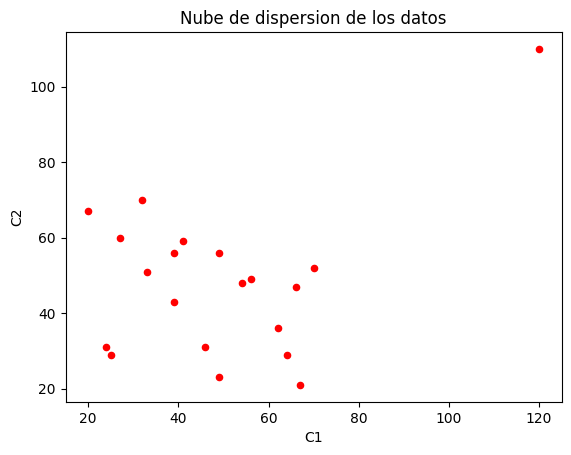

In [27]:
df.plot(kind= 'scatter',
        x = 'C1',
        y = 'C2',
        color = 'red')

plt.title('Nube de dispersion de los datos')
plt.xlabel('C1')
plt.ylabel('C2')

plt.show()

In [7]:
df.describe()

,C1,C2
count,20.000000,20.000000
mean,49.150000,48.400000
std,22.834127,20.428051
min,20.000000,21.000000
25%,32.750000,31.000000
50%,47.500000,48.500000
75%,62.500000,56.750000
max,120.000000,110.000000


In [11]:
df['C1-C1_mean'] = (df['C1'] - df['C1'].mean())**2
df['C2-C2_mean'] = (df['C2'] - df['C2'].mean())**2
df['(C1-C1_mean)(C2-C2_mean)'] = (df['C1'] - df['C1'].mean())*(df['C2'] - df['C2'].mean())
df

,C1,C2,C1-C1_mean,C2-C2_mean,(C1-C1_mean)(C2-C2_mean)
0,120,110,5019.7225,3794.56,4364.36
1,54,48,23.5225,0.16,-1.94
2,20,67,849.7225,345.96,-542.19
3,62,36,165.1225,153.76,-159.34
4,24,31,632.5225,302.76,437.61
5,39,43,103.0225,29.16,54.81
6,49,23,0.0225,645.16,3.81
7,27,60,490.6225,134.56,-256.94
8,56,49,46.9225,0.36,4.11
9,66,47,283.9225,1.96,-23.59


In [18]:
var_c1 = round(sum(df['C1-C1_mean'])/20,2)
var_c1

495.33

In [19]:
var_c2 = round(sum(df['C2-C2_mean'])/20,2)
var_c2

396.44

In [21]:
covar_c1c2 = sum(df['(C1-C1_mean)(C2-C2_mean)'])/20
covar_c1c2

156.24

In [22]:
b_c2_sobre_c1 = covar_c1c2/var_c1
b_c2_sobre_c1

0.31542607958330815

In [23]:
a_c2_sobre_c1 = df['C2'].mean() - b_c2_sobre_c1*df['C1'].mean()
a_c2_sobre_c1

32.896808188480406

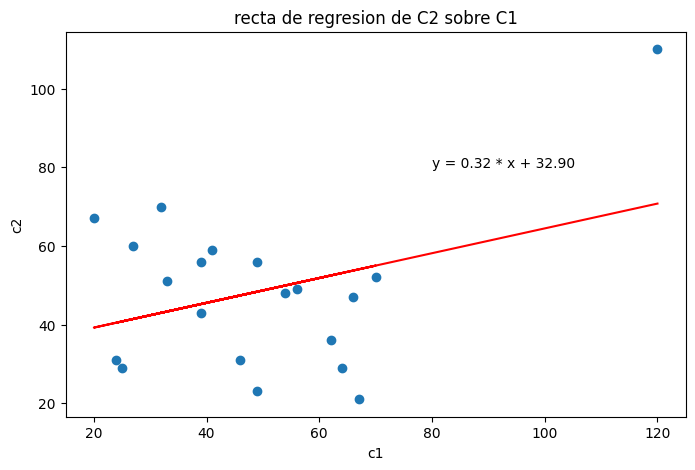

In [54]:
plt.figure(figsize = (8,5))
plt.scatter(df['C1'], df['C2'])
plt.plot(df['C1'],
         b_c2_sobre_c1 * df['C1'] + a_c2_sobre_c1,
         color = 'red',
         )

plt.annotate(F'y = {b_c2_sobre_c1:.2f} * x + {a_c2_sobre_c1:.2f}', xy = (80, 80))
plt.title('recta de regresion de C2 sobre C1')
plt.ylabel('c2')
plt.xlabel('c1')

plt.show()

In [31]:
b_c1_sobre_c2 = covar_c1c2/var_c2
b_c1_sobre_c2

0.39410755725961055

In [33]:
a_c1_sobre_c2 = df['C1'].mean() - b_c2_sobre_c1*df['C2'].mean()
a_c1_sobre_c2

33.88337774816789

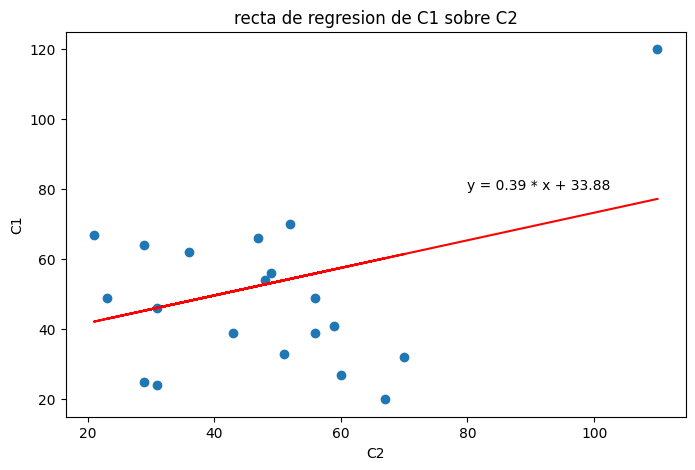

In [52]:
plt.figure(figsize = (8,5))
plt.scatter(df['C2'], df['C1'])
plt.plot(df['C2'],
         b_c1_sobre_c2 * df['C2'] + a_c1_sobre_c2,
         color = 'red')

plt.annotate(F'y = {b_c1_sobre_c2:.2f} * x + {a_c1_sobre_c2:.2f}', xy = (80, 80))
plt.title('recta de regresion de C1 sobre C2')
plt.ylabel('C1')
plt.xlabel('C2')

plt.show()

In [36]:
print(df['C1'].mean())
print(df['C2'].mean())

49.15
48.4


In [42]:
156/(np.sqrt(var_c1)*np.sqrt(var_c2))

0.3520371922812838

In [43]:
df.corr()

,C1,C2,C1-C1_mean,C2-C2_mean,(C1-C1_mean)(C2-C2_mean)
C1,1.000000,0.352580,0.641012,0.692218,0.681854
C2,0.352580,1.000000,0.713785,0.588853,0.628722
C1-C1_mean,0.641012,0.713785,1.000000,0.952790,0.942834
C2-C2_mean,0.692218,0.588853,0.952790,1.000000,0.914371
(C1-C1_mean)(C2-C2_mean),0.681854,0.628722,0.942834,0.914371,1.000000


In [ ]:
# plt.figure(figsize = (15, 8))

# from scipy import stats
# slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)

# import seaborn as sns
# sns.regplot(x = xdata, y = ydata)
# plt.xlabel('Protein Concentration (mg/mL)')
# plt.ylabel('$A_{595}$')
# plt.annotate(F'y = {slope:.4f} * x + {intercept:.4f}', xy = (0.2, 0.5))
# plt.savefig('Bradford_plot2.png', dpi = 600, bbox_inches = 'tight')